# ===========================================================
# Analysis of the Jeopardy-like dataset
# ===========================================================

## Goals:
####   1. Putting the data into a good format (DataFrame or Proto) to facilitate further analysis
####   2. Analysis of the dynamics of appraisal networks and commuincations

# Imports

In [6]:
from __future__ import division, print_function, absolute_import, unicode_literals

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import imp
from collections import defaultdict
%matplotlib inline

import sys
sys.path.insert(0, '../src/')

import text_processor
import pogs_jeopardy_log_lib
import Softmax_Loss

imp.reload(pogs_jeopardy_log_lib)
imp.reload(text_processor)

<module 'text_processor' from '../src/text_processor.py'>

In [2]:
sentiment_analyzer = text_processor.SentimentAnalyzer()
emotion_analyzer = text_processor.EmotionDetector()

# Parameters

In [3]:
directory = '/home/omid/Datasets/Jeopardy/'

# Helper functions

In [4]:
def plot_for_one_member(member):
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(231)
    number_of_messages_over_time = []
    for i in range(9):
        number_of_messages_over_time.append(np.mean(number_of_messages[member][5*i:5*(i+1)]))
    plt.plot(number_of_messages_over_time)
    plt.title('Number of messages.')

    plt.subplot(232)
    sentiment_of_messages_over_time = []
    for i in range(1, 10):
        sents = np.array(sentiment_of_messages[member][5*i:5*(i+1)])
        sentiment_of_messages_over_time.append(np.mean(sents[~np.isnan(sents)]))
    plt.plot(sentiment_of_messages_over_time)
    plt.title('Sentiment of messages.')

    plt.subplot(233)
    valence_of_messages_over_time = []
    for i in range(1, 10):
        tmps = np.array(emotion_valence_of_messages[member][5*i:5*(i+1)])
        valence_of_messages_over_time.append(np.mean(tmps[~np.isnan(tmps)]))
    plt.plot(valence_of_messages_over_time)
    plt.title('Valence of messages.')

    plt.subplot(234)
    arousal_of_messages_over_time = []
    for i in range(1, 10):
        tmps = np.array(emotion_arousal_of_messages[member][5*i:5*(i+1)])
        arousal_of_messages_over_time.append(np.mean(tmps[~np.isnan(tmps)]))
    plt.plot(arousal_of_messages_over_time)
    plt.title('Arousal of messages.')

    plt.subplot(235)
    dominance_of_messages_over_time = []
    for i in range(1, 10):
        tmps = np.array(emotion_dominance_of_messages[member][5*i:5*(i+1)])
        dominance_of_messages_over_time.append(np.mean(tmps[~np.isnan(tmps)]))
    plt.plot(dominance_of_messages_over_time)
    plt.title('Dominance of messages.');

# Analysis

In [3]:
team = pd.read_csv(directory+"team.csv",sep=',',quotechar="|",names=["id","sessionId","roundId", "taskId"])
data = {}
for i in range(len(team)):  
    team_id = team.iloc[i]['id']
    print("Values of team", team_id, '...')
    #create model
    try:
        data[team_id] = pogs_jeopardy_log_lib.TeamLogProcessor(team_id=team_id, logs_directory_path=directory)
    except:
        print('Team {} had some problems.'.format(team_id))
        continue

Values of team 7 ...


../src/pogs_jeopardy_log_lib.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  elNoMessage["sender_subject_id"] = pd.to_numeric(elNoMessage["sender_subject_id"])


Team 7 had some problems.
Values of team 10 ...
Values of team 11 ...
Values of team 12 ...
Values of team 13 ...
Values of team 14 ...
Team 14 had some problems.
Values of team 15 ...
Team 15 had some problems.
Values of team 16 ...
Team 16 had some problems.
Values of team 17 ...
Values of team 19 ...
Team 19 had some problems.
Values of team 20 ...
Values of team 21 ...
Values of team 22 ...
Team 22 had some problems.
Values of team 23 ...
Team 23 had some problems.
Values of team 27 ...
Team 27 had some problems.
Values of team 28 ...
Values of team 30 ...
Values of team 31 ...
Team 31 had some problems.
Values of team 32 ...
Team 32 had some problems.
Values of team 33 ...
Values of team 34 ...
Values of team 35 ...
Team 35 had some problems.
Values of team 36 ...
Values of team 37 ...
Values of team 38 ...
Values of team 39 ...
Values of team 40 ...
Team 40 had some problems.
Values of team 41 ...
Values of team 42 ...
Values of team 43 ...
Values of team 44 ...
Values of team 45

In [5]:
len(data)

27

In [15]:
data.keys()

dict_keys([75, 10, 11, 12, 13, 77, 17, 82, 20, 21, 28, 30, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49, 74])

In [292]:
# Well performing.
# team_info = data[36]
# team_info = data[49]

# Bad performing.
team_info = data[34]
# team_info = data[42]

In [305]:
team_info.messages[2]

,id,event_type,event_content,timestamp,completed_task_id,sender_subject_id,receiver_subject_id,session_id,sender,receiver,extra_data,team_id
11093,14375,COMMUNICATION_MESSAGE,does anyone know?,2019-05-21 10:17:36,183,123,\N,28,pogs26.2,\N,\N,34
11094,14376,COMMUNICATION_MESSAGE,should we ask the machine?,2019-05-21 10:18:00,183,125,\N,28,pogs26.4,\N,\N,34
11095,14377,COMMUNICATION_MESSAGE,i have no clue,2019-05-21 10:18:03,183,122,\N,28,pogs26.1,\N,\N,34
11096,14378,COMMUNICATION_MESSAGE,same,2019-05-21 10:18:06,183,124,\N,28,pogs26.3,\N,\N,34
11098,14380,COMMUNICATION_MESSAGE,ok machine,2019-05-21 10:18:19,183,123,\N,28,pogs26.2,\N,\N,34
11099,14381,COMMUNICATION_MESSAGE,roosevelt?,2019-05-21 10:18:22,183,123,\N,28,pogs26.2,\N,\N,34
11100,14382,COMMUNICATION_MESSAGE,sure,2019-05-21 10:18:25,183,125,\N,28,pogs26.4,\N,\N,34


In [295]:
team_info.teamScore[-1]

80

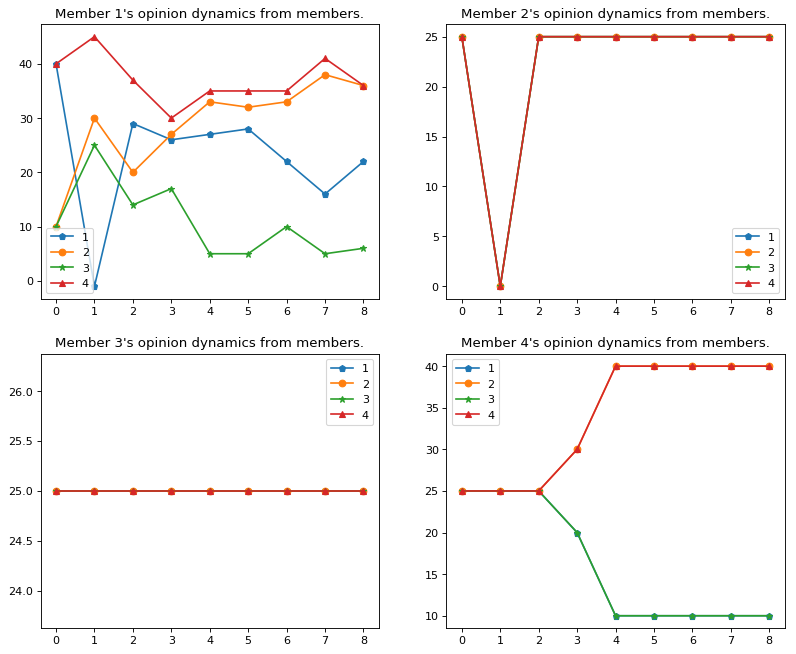

In [296]:
# Dynamics of the opinion i w.r.t. j:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
index = 221
tickers = ['p', 'o', '*', '^']
for i in range(4):
    plt.subplot(221 + i)
    for j in range(4):
        dynamics_of_opinion_i_of_j = np.array(team_info.memberInfluences)[:, i][:, j]
        plt.plot(dynamics_of_opinion_i_of_j, '-'+tickers[j])
    plt.legend([1, 2, 3, 4])
    plt.title('Member {}\'s opinion dynamics from members.'.format(i+1));

In [298]:
team_info.teamArray

['pogs26.2', 'pogs26.3', 'pogs26.1', 'pogs26.4']

In [299]:
number_of_messages = defaultdict(list)
sentiment_of_messages = defaultdict(list)
emotion_valence_of_messages = defaultdict(list)
emotion_arousal_of_messages = defaultdict(list)
emotion_dominance_of_messages = defaultdict(list)
for member in team_info.teamArray:
    for messages in team_info.messages:
        member_message_content = messages[messages.sender == member].event_content
        number_of_messages[member].append(len(member_message_content))
        
        sentiments = []
        for message in list(member_message_content):
            sentiments.append(sentiment_analyzer.compute_sentiment(message))
        sentiment_of_messages[member].append(np.mean(sentiments))
        
        valence = []
        arousal = []
        dominance = []
        for message in list(member_message_content):
            emo = emotion_analyzer.compute_mean_emotion(message)
            if emo[0] > 0:
                valence.append(emo[1])
                arousal.append(emo[2])
                dominance.append(emo[3])
        emotion_valence_of_messages[member].append(np.mean(valence))
        emotion_arousal_of_messages[member].append(np.mean(arousal))
        emotion_dominance_of_messages[member].append(np.mean(dominance))

/home/omid/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/omid/.local/lib/python3.5/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [300]:
for member in team_info.teamArray:
    print('Number of messages:', np.mean(number_of_messages[member]), '+-', np.std(number_of_messages[member]))
    
    sents = np.array(sentiment_of_messages[member])
    print('Sentiment of messages:', np.mean(sents[~np.isnan(sents)]))
    
    emo_val = np.array(emotion_valence_of_messages[member])
    print('Valence of messages:', np.mean(emo_val[~np.isnan(emo_val)]))
    emo_ar = np.array(emotion_arousal_of_messages[member])
    print('Arousal of messages:', np.mean(emo_ar[~np.isnan(emo_ar)]))
    emo_dom = np.array(emotion_dominance_of_messages[member])
    print('Dominance of messages:', np.mean(emo_dom[~np.isnan(emo_dom)]))
    
    print('\n')

Number of messages: 1.2 +- 1.2036980056845192
Sentiment of messages: 0.04694876543209877
Valence of messages: 6.1030303030303035
Arousal of messages: 4.876174242424242
Dominance of messages: 5.836022727272728


Number of messages: 0.8222222222222222 +- 0.9015761233378132
Sentiment of messages: -0.015229166666666663
Valence of messages: 5.4653472222222215
Arousal of messages: 4.932291666666667
Dominance of messages: 5.273402777777778


Number of messages: 0.2222222222222222 +- 0.5921294486432991
Sentiment of messages: -0.012076190476190471
Valence of messages: 6.09125
Arousal of messages: 5.150625
Dominance of messages: 5.845625


Number of messages: 0.9333333333333333 +- 0.8273115763993905
Sentiment of messages: 0.14081666666666667
Valence of messages: 6.163522727272727
Arousal of messages: 4.91310606060606
Dominance of messages: 5.601022727272728




/home/omid/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/omid/.local/lib/python3.5/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


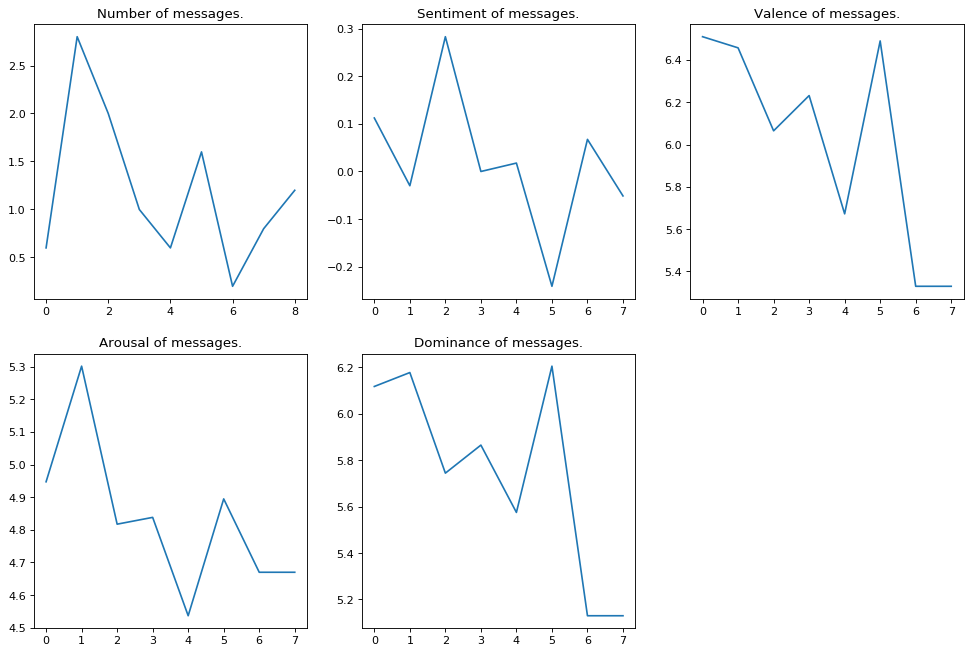

In [301]:
member = 1

plot_for_one_member(member=team_info.teamArray[member - 1])

### For all teams

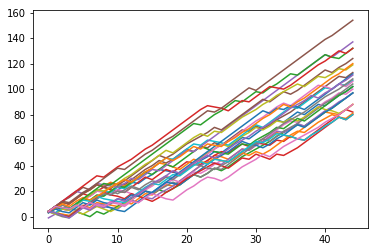

In [82]:
final_scores = []
for team_id, team_info in data.items():
    plt.plot(team_info.teamScore)
    final_scores.append(team_info.teamScore[-1])

In [91]:
final_scores = np.array(final_scores)
print('Min:\t{}\nMax:\t{}\nMean:\t{}\nStd:\t{}\nMedian:\t{}'.format(
    np.min(final_scores),
    np.max(final_scores),
    np.mean(final_scores),
    np.std(final_scores),
    np.median(final_scores)))

Min:	80
Max:	154
Mean:	105.96296296296296
Std:	18.520222143859062
Median:	104.0


In [151]:
np.where(final_scores == 80)

(array([13, 19]),)

In [254]:
list(data.keys())[13]

34

In [255]:
list(data.keys())[19]

42

In [200]:
np.where(final_scores == 154)

(array([25]),)

In [201]:
list(data.keys())[25]

49